# 학습 목표

- 레이어의 개념
- 딥러닝 모델 속 각 레이어(Linear, Convolution)의 동작 방식을 이해
- 데이터의 특성을 고려한 레이어를 설계, 이를 Tensorflow로 정의

## 딥러닝은 y = Wx + b 에서 최적의 W(weight)와 b(bias)를 찾는 과정 

이는 딥러인의 미싱 링크라 칭함.  
우리가 정의하는 수많은 신경망들은 각기 다른 형태의 Weight를 갖고 있고, 그마다 독특한 특성을 가짐.  
데이터에서 원하는 특징을 효과적으로 추출하기 위해서 올바를 Weight를 정의하는 과정이 중요.  


### 데이터의 형태

딥러닝을 이해하는 방법 중 가장 쉬운 방법은 데이터의 형태를 파악

이미지 데이터는 채널(Channel)이라는 것을 가짐. RGB Red채널, Green채널, Blue채널 표현 방식에 따라 Channel, Width, Height (C,W,H), (W,H,C)로 표기함. 

### 레이어

여러 개의 논리적인 개체가 층을 이루어 하나의 물체를 구성하는 경우, 이러한 각각의 객체를 하나의 레이어라 한다.


신경망의 Weight > 레이어의 Weight가 맞음. 신경망은 레이어들의 각기 다른 Weight, 그것들이 유기적으로 연결되어 이뤄내는 하나의 결과물. 마치 인간의 두뇌와 닮아서 인공신경망이라는 이름을 갖게 된다. 


# Linear 레이어

선형대수학에서 쓰이는 용어 중 선형 변환(Linear Transform)이 있는데, 그것과 완전히 동일한 기능을 하는 레이어  
선형대수학이란 -> 행렬에 의해 변형된 공간에서 직선들은 평행을 유지하게 되는데 이것은 유클리드기하에서 다루는 기하학적인 구조이다. 따라서 선형대수학이란 행렬을 이용하여 이러한 구조를 대수적으로 계산하고 분석하는 학문이다. 

선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 한다.  
100차원 -> 300차원 , 100차원 -> 10차원


<식1>  
1단계 : (4,2)(2,1) = (4,)  
2단계 : (4,)(4,1) = (1,)  
2차원을 1차원으로 변환하는 데에 (2,1)행렬 선언  
4차원을 1차원으로 변환하는 데에 (4,1)행렬 선언  
각각의 행렬들이 Weight  
Linear 레이어는 (입력의 차원, 출력의 차원)에 해당하는 Weight를 가지는 특성을 가지고 있다. 

In [2]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


그러나 ,but 식을 계산해보니 1단계를 거친 결과가 동일함.그러면 두번째 (4,1)Weight를 거치는 것이 의미가 없어짐. 여기서 모든 Weight의 모든 요소를 Parameter라고 함. 이 parameter로 이 문제를 해결하기엔 역부족. 이번엔 데이터를 더 풍부하게 ㄱ

<식2>  
1단계 : (4,2)(2,3) = (4,3)  
2단계 : (4,3)(3,1) = (4,)  
3단계 : (4,)(4,1) = (1,)

여기서 사용된 parameter의 개수  2x3, 3x1,4x1 = 13개

In [4]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

#  total_params에서의 '\'는 특별한 의미를 갖는 것이 아닌 파이썬 내 줄바꾸기를 위한 것입니다.

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


그렇다고 parameter가 많은 것이 최고냐? 하면 그것은 아니다.  
왜 why? 지나치게 많은 parameter는 과적합(overfitting)을 야기한다.  
쉽게 말해 학생이 문제만 보고 정답을 외우는 것과 같다.  
우리는 이런 방법들로 Weight의 형태만 선언해 주고 그 parameter 값을 임의의 실수가 채우고, 수많은 데이터를 거치며 가장 적합한 Weight를 알아서 찾아가는 과정이 바로 훈련(Training)이다. 

그리고 이야기할 것이 무엇이냐 .편향(Bias).  
y = Wx + b. Wx에 단순히 더하기 때문에 편향 값은 형태가 (선형변환 결과 차원,) 인 한 줄짜리 Weight로 정의된다. 

# 정보 집약! Convolution 레이어

<식3>  
1단계 : (1920,1080,3) -> (1,1920 X 1080 X 3)  
2단계 : (1, 6220800) (6220800,) = (1,)  
620만개의 Parameter 생성. 비효율적임. 그래서 고안된 것이 Convolution 레이어  


이미지를 필터로 훑으며 각 픽셍르 더하여 곱하는 Convolution 연산  
이미지와 필터가 겹치는 부분의 값을 서로 곱한 후 그 값을 모두 더하면 새로운 이미지의 한 픽셀값이 된다.  
핕러는 다른 말로 커널이라고도 불린다.  
이미지를 필터로 훑을 때, 한 칸씩 이동하며 훑을 수도 있지만, 두 칸, 세 칸씩 이동하며 훑을 수도 있다. 그것을 결정하는 값을 Stride라고 한다. 

Convolution 연산은 '입력의 형태를 변형시킨다.'  
쉽게 말해, [0,1,2,3,4]라는 데이터를 [-1,0,1]이라는 필터로 훑으면 가장  촘촘하게 (Stride=1) 이동했을 때 3번밖에 연산을 진행하지 못한다는 것임.  
데이터 입력의 형태는 (5,)였는데 연산 이후 데이터의 출력은 (3,)인 [2,2,2]가 된다.  
이를 방지하기 위한 개념이 Padding.  
입력의 테두리에 0을 추가해 (ex.[0,01,2,3,4,0])입력의 형태를 유지할 수 있게 함.  

Padding을 이용하는 이유  
- Convolution 후 아웃풋 이미지의 크기를 유지하기 위해
- Edge 쪽 픽셀 정보를 더 잘 이용하기 위해

앞서 배운 필터들은 이미지를 선명하게, 혹은 흐리게 한다는 목적을 가지고 있었죠? 필터가 어떤 목적을 가질 수 있다면, 손을 찾는 데에 적합한 필터도 존재할 수 있지 않을까요? 목적에 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 상상할 수 있겠군요! 그런 멋진 필터를 훈련을 통해 찾아주는 것이 바로 Convolution 레이어가 하는 일입니다. 심지어는 단 하나의 필터가 아닌 수십 개의 필터를 중첩해서요! 이 말은 아래 그림처럼 Convolution 레이어가 [ 필터의 개수 x 필터의 가로 x 필터의 세로 ] 로 이루어진 Weight를 갖는다는 사실을 유추할 수 있게 합니다.

<식 4>  
(* 기호는 Convolution 연산을 뜻합니다)  
1단계: (1920, 1080, 3) * (3, 16, 5, 5) Stride 5 = (384, 216, 16)  
2단계: (384, 216, 16) → (1, 384 x 216 x 16)  
3단계: (1, 1327104) \cdot⋅ (1327104, ) = (1, )

<식 4>는 16개의 5 x 5 필터를 가진 Convolution 레이어를 정의 하여 이미지를 Stride 5 로 훑었고, 그렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약 하였습니다. 필터들은 입력의 3채널에 각각 적용되므로 Convolution 레이어의 파라미터는 3 x 16 x 5 x 5 = 1200개 입니다.

<식 3>의 Parameter는 620만 개인데 반해 <식 4>는 약 130만 개 로 크게 줄여냈습니다. 심지어 단 한 개의 레이어인데도 말이죠! Convolution 레이어는 입력의 정보를 집약시키는 효과가 뛰어나기 때문에 여러 겹의 레이어를 중첩하는 것이 일반적이고, 중첩할수록 최종 Linear 레이어는 작아지게 됩니다. 입력에서 중요한 부분을 뽑아내는 데에 최적화되는 거죠!

1920 x 1080 인 입력 데이터 크기에 비해 5 x 5는 손이라는 객체를 판별해 낼 수 있을 만큼 유의미한 정보를 담기에는 작은 필터 사이즈일 가능성이 높다.
입력의 크기를 줄이거나 필터 크기를 키울 필요가 있다.

필터의 크기와 Stride를 같게 하면 손이 필터의 경계선에 걸리는 경우, 정상적으로 인식하지 못할 수 있다. Stride를 줄여 이미지를 더 자세하게 살피도록 설계하자.

In [5]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


# Pooling 레이어. 핵심만 추려서 더 넓게 

### Convolution레이어의 정보 집약 효과, 충분한가?

Linear레이어는 입력 피처 전체가 매 출력에 미치는 영향의 가중치를 모든 입력 피처 사이에 전부 고려함.  
  
이미지처럼 지역성(Locality) 그 자체가 중요한 정보는, LInear 레이어는 그 중요한 정보 모두 손실된 채 큰 파라미터 속에서 입력과 출력 사이의 관계 가중치를 찾아내야 한다. 이는 매우 어렵다.  
  
그러나 but, Convolution 레이어는 필터 구조 안에 Locality 정보가 온전히 보존됨.  
  
인접한 픽셀들 사이에서의 패텀나 추출할 수 있다는 것 자체만으로도 불필요한 파라미터 및 연산량을 제거하고 더 정확하고 효율적으로 정보 집약 가능

그러나 but, 이전 Q4 문제에서처럼, Convolution레이어만으로 손이라는 객체 판별에 충분했나? ㄴㄴ 두가지 문제가 있었음

- 5 X 5라는 필터 사이즈는 object detection을 위한 유의미한 정보를 담아내기에 너무 작다.  
- 이미 Stride를 5로 주고 있었기에 연산량이 줄어드는 효과는 발생했지만, 찾고자 하는 object가 필터 경계선에 걸려서 인식하지 못할 우려가 있다. 

그렇다면 필터 사이즈를 크게 하는 게 답이냐? ㄴㄴ  
만일 극단적으로 필터 사이즈를 이미지 사이즈와 동일하게 한다면 어떤 일이 생기냐?  
그 순간 Convolution 레이어가 Linear레이어와 같아지게 된다.  
필터 사이즈를 키우게 되면 파라미터 사이즈와 연산량이 커질 뿐 아니라, Accuracy도 떨어지게 될 가능성이 높음. 

### Receptive Field 개념

그럼 우리가 해야될것은? 바로 수용영역(Receptive Field).  
Neural Network의 출력부가 충분한 정보를 얻기 위해 커버하는 입력 데이터의 Receptive Field가 충분히 커서 그 안에 detect해야 할 object의 특성이 충분히 포함되어 있어야 정확한 detection이 가능하게 된다.  
어쩌면 필요한 Receptive Field의 크기는 거의 이미지 크기 전체가 되는 경우도 있음. 

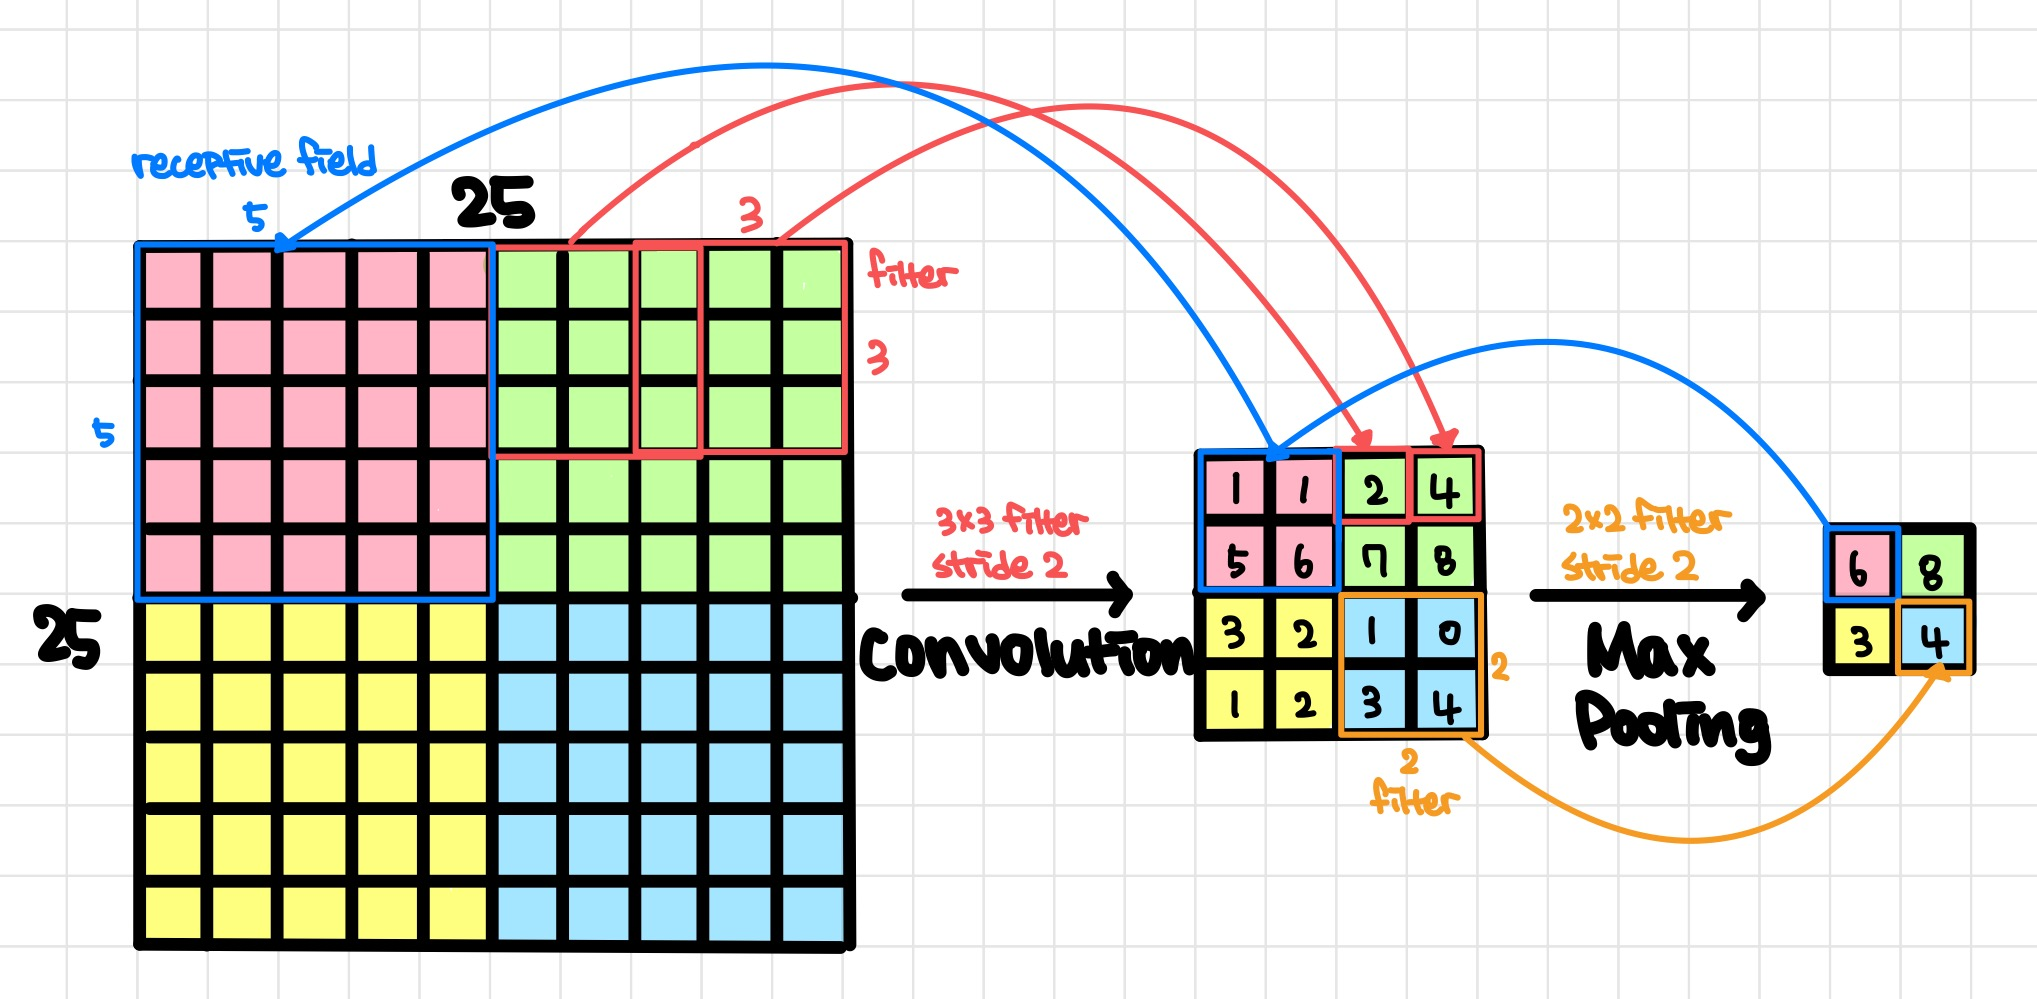

### Max Pooling 레이어의 의미

Max Pooling 레이어를 통해 효과적으로 Receptive Field를 키우고, 정보 집약 효과를 극대화할 수 있음. 하지만 이러는 동안 늘어난 파라미터 사이즈는 0

#### Max pooling 이 좋은 효과 

- translational invariance 효과  
이미지는 약간의 상하좌우 시프트가 생긴다고 해도 내용상 동일한 특징이 있음.  
Max Pooling을 통해 인접한 영역 중 가장 특징이 두드러진 영역 하나를 뽑는 것은 오히려 약간의 시프트 효과에도 불구하고 동일한 특징을 안정적으로 잡아낼수 있는 긍정적 효과가 있어서 오히려 object위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과를 가져온다고 함.

- Non linear 함수와 동일한 피처 추출 효과  
Relu와 같은 Non-linear 함수도 마찬가지로 많은 하위 레이어의 연산 결과를 무시하는 효과를 발생시키지만, 그 결과 중요한 피처만을 상위 레이어로 추출해서 올려줌으로써 결과적으로 분류기의 성능을 증진시키는 효과를 가진다.  
Min/Max Pooling도 이와 동일한 효과를 가지게 된다. 


- Receptive Field 극대화 효과  
Max Pooling이 없이도 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야 한다. 그 결과 큰 파라미터 사이즈로 인한 오버피팅, 연산략 증가, Gradient Vanishing 등의 문제를 감수해야 한다.  
이런 문제를 효과적으로 해결하는 방법으로 꼽히는 두 가지 중 하나가 Mac Pooling 레이어 사용이다.  
다른 하나로는 Dilated Convolution이 있다. 

### 집약 정보 복원 ! Deconvolution레이어

그러나 but,한 가지 의심이 드는 점.  
Convolution 레이어를 통해 집약된 정보가 원본 데이터의 정보를 너무 많이 손실해 버린 것은 아닐까?  
이 손실된 정보에 의존하는 이미지 분류, 오브젝트 디텍션 드으이 결과를 신뢰할 수 있을까?  


Convolution의 결과를 역재생해서 원본 이미지와 최대한 유사한 정보를 복원해 내는 Auto Encoder에 대해 알아보려 한다. 

MNIST 데이터셋을 입력받아 그대로 복원하는 Auto Encoder를 아래와 같이 만들어 본다. 

- 패키지 임포트 및 MNIST 데이터셋 로딩
- AutoEncoder 모델 구성
- AutoEncoder 모델 훈련
- AutoEncoder Reconstruction Test

In [6]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 4)           292   

Keras Model 구성 규칙으로 어렵지 않게 이해할 수 있다.  
model summary() 메소드를 통해 네트워크의 Output이 어떻게 변해가는지도 확인 가능

여기서 주의할 점!  
Conv2D 레이어는 shape를 변화시키지 않고 있다는 점.  
Output shape를 변화시키는 것은 오롯이 MaxPooling2D 레이어의 역할임

그래서 Encoder를 통과한 직후의 Output은 4 X 4 의 shape가 되어 있다.

Decoder 레이어를 다뤄보겠다.  
Conv2D 레이어와 UpSampling2D 레이어를 거쳐 최종적으로 28 X 28 사이즈의 출려이 나온다.  
여기서도 shape를 변화시키는 것은 UpSampling2D 뿐이다.

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/2
235/235 [==============================] - 22s 92ms/step - loss: 0.6864 - val_loss: 0.6858
Epoch 2/2
235/235 [==============================] - 22s 92ms/step - loss: 0.6851 - val_loss: 0.6842


AutoEncoder를 훈련시켰다. 2 Epochs만 실행.  
이후로도 loss는 계속 떨어질 것이다.  
y_train이 들어가여 할 자리에 x_train이 들어가 있음을 유의해야 한다.  
그리고 loss로 주로 분류 모델에서 사용되는 binary_crossentropy를 사용해서 다소 의아할 수 있다.  
그러나 모든 dim에서 0~1 사이의 값을 가지는 입력 데이터와 출력 데이터(마지막 출력이 sigmoid로 제어되고 있음에 유의할 것) 사이의 분포가 최대한 유사하기를 바라기 때문에 loss는 타당하다.

1/1 [==============================] - 0s 87ms/step


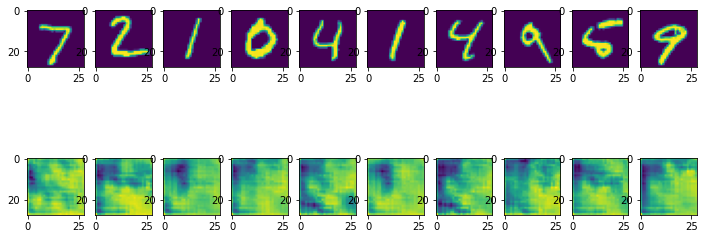

In [9]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

훈련이 끝나고, 결과가 썩 만족스럽지 않다.  
하지만 동일한 Decoder 네트워크 구조를 가지고도 Variational Autoencoder나 DCGAN 등은 훨씬 훌륭한 이미지를 생성하기에, Decoder 네트워크 구조만의 문제는 아닐 것이다. 

### Decoder Layers for Reconstruction

우리가 위에서 Decoder에서 이미지 복원을 위해 사용했던 Convolution 레이어는 실은 Encoder에서 사용했던 것과 동일한 레이어였습니다. 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있는 것입니다. 어쨌거나 Convolution 레이어를 거쳐 정보가 집약되는 것이 아니라 오히려 정보량이 많아지고 있습니다

엄밀히 말해, 이것은 Convolution의 수학적 역연산으로서의 Deconvolution과는 다릅니다. 오히려 정방향의 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생해 내는 효과를 구현한 것입니다. 하지만 Convolution을 통해 Output shape가 줄어드는 것이 얼마든지 가능하듯, 늘어나는 것도 얼마든지 가능합니다. 단지 우리의 AutoEncoder 구조가 얼마나 정보손실 없이 원본 데이터를 잘 압축하고 있느냐에 따라 Decoder가 뽑아낼 수 있는 최종적인 이미지의 퀄리티가 결정됩니다.

하지만 Image Reconstruction을 위해서 일반적으로 많이 사용하는 Transposed Convolution을 방금 활용한 것은 아닙니다. 오히려 방금은 Convolution 레이어를 활용해서 Transposed Convolution를 흉내 낸 것에 불과합니다.

#### Upsampling 레이어

Max pooling 레이어를 통해 Downsampling을 시도해 왔다면, 이제 Upsampling 레이어를 통해 그 반대 작업을 수행하게 됩니다. 그런데 이게 가능한 걸까요? 정보를 버리는 것은 가능하지만, 이미 버린 정보를 복원하는 것이 얼마나 쉬울까요?

3가지 방법이 있음  

- Nearest Neighbor : 복원해야 할 값을 가까운 값으로 복제한다.
- Bed of Nails : 복원해야 할 값을 0으로 처리한다.
- Max Unpooling : Max Pooling 때 버린 값을 실은 따로 기억해 두었다가 그 값으로 복원한다.

https://analysisbugs.tistory.com/104  

우리는 위에서 파라미터를 별도로 주지 않았으므로 디폴트인 Nearest Neighbor로 복원하였습니다.


#### Transposed Convolution

이 어려운 주제에 대해 시각적으로나 이론적으로 정말 훌륭한 설명 자료가 있어 이를 소개합니다.  
https://zzsza.github.io/data/2018/06/25/upsampling-with-transposed-convolution/

우리는 위에서 Transposed Convolution을 활용하지는 않았습니다. 만약 활용했다면 모델 구조는 아래와 같이 될 것입니다. 아래 모델 구조를 활용해서 AutoEncoder를 학습한다면 결과가 어떻게 달라질지 비교해 보는 것도 재미날 것입니다. 오늘의 실습 과제로 남깁니다.

In [10]:
from tensorflow.keras.layers import Conv2DTranspose

# Conv2DTranspose를 활용한  AutoEncoder 모델
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu')
encode_pool_layer_1 = MaxPooling2D((2, 2))
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu')
encode_pool_layer_2 = MaxPooling2D((2, 2))
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분  - 
decode_conv_layer_1 = Conv2DTranspose(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2DTranspose(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 4)           292 

https://hobinjeong.medium.com/cnn%EC%97%90%EC%84%9C-pooling%EC%9D%B4%EB%9E%80-c4e01aa83c83  
https://amber-chaeeunk.tistory.com/24  
https://sefer-raziel.notion.site/CNN-Convolutional-Neural-Network-Transfer-Learning-Intro-a0e4b16507a14d9ba99777fcbd9dede8